# 新生儿名字分析

新生儿名字数据存储在一系列txt文件中，文件名为yobxxxx.txt，其中xxxx是四位数的年份，从1880年开始。文件记录格式为逗号分隔的csv格式。

每个文件中包含一系列记录，每个记录包含三列数据：名字、性别、出生数量。性别取值为'M'和'F'分别对应于男孩和女孩。出生数量表示当年该名字的新生儿数量。

基本特征分析：
* 统计名字的使用数量
* 名字的长度分布规律
* 名字的结尾字母分布规律
* 根据性别统计常用名

猜猜看：有一本书的作者是个美国人，名字的尾字母是'p'，你觉得ta是男还是女？那如果是'a'或者'n'，你猜是男还是女？

首先，引入一些扩展库。pandas主要用于数据分析，matplotlib是一个绘图库。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

然后，将文件中的数据导入dataframe对象。

In [2]:
begin=1880
end=2010
pieces=[]
for year in range(begin,end+1):
    filename='./names/yob{0:4d}.txt'.format(year)
    recs=pd.read_csv(filename,sep=',',names=['name','sex','births'])
    recs['year']=year
    pieces.append(recs)

将每年的数据拼接起来，形成一张大表。

In [3]:
df=pd.concat(pieces,ignore_index=True)

看看这张表的信息。

In [4]:
df.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
df.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


计算各个名字的长度，存入表格。

In [6]:
df['len_of_name']=df['name'].str.len()

接下来，将名字的首尾字母提取出来，存入表格。

In [7]:
#help(pd.Series.str)

In [8]:
df['first_letter']=df['name'].str[0]
df['last_letter']=df['name'].str[-1]

提取字符串中的首尾字母有多种方法。以下列出另外两种。

In [9]:
#help(pd.Series.str.slice)

In [10]:
df['first_v2']=df['name'].str.slice(stop=1)
df['last_v2']=df['name'].str.slice(start=-1)

In [11]:
def first_letter(s):
    if len(s)>0: return(s[0])
def last_letter(s):
    if len(s)>0: return(s[-1])

In [12]:
df['first_v3']=df['name'].apply(first_letter)
df['last_v3']=df['name'].apply(last_letter)

看看现在表格处理的结果。

In [13]:
df.head()

,name,sex,births,year,len_of_name,first_letter,last_letter,first_v2,last_v2,first_v3,last_v3
0,Mary,F,7065,1880,4,M,y,M,y,M,y
1,Anna,F,2604,1880,4,A,a,A,a,A,a
2,Emma,F,2003,1880,4,E,a,E,a,E,a
3,Elizabeth,F,1939,1880,9,E,h,E,h,E,h
4,Minnie,F,1746,1880,6,M,e,M,e,M,e


## 1. 统计各年度特定名字的使用数量和趋势。

In [14]:
#help(pd.pivot_table)

In [15]:
selected_names =['Mary','Anna','John','Michael']
selected_dataset = df[df['name'].isin(selected_names)]
df01 = selected_dataset.pivot_table(values='births',columns='name',index='year',aggfunc='sum',fill_value=0)
df01.head()

name,Anna,John,Mary,Michael
year,,,,
1880,2616,9701,7092,354
1881,2714,8795,6948,298
1882,3143,9597,8179,321
1883,3322,8934,8044,307
1884,3880,9427,9253,373


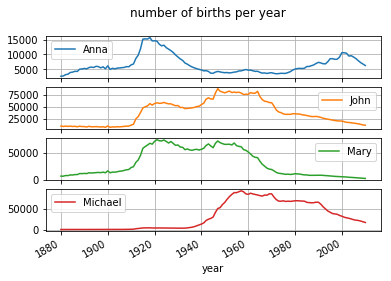

In [16]:
df01.plot(title='number of births per year',grid=True,subplots=True)
plt.show()

## 2. 统计各个年度名字首字母的分布情况

可以按照名字来汇总统计，得到名字的数量。

也可以按照出生数量来汇总统计，得到新生儿数量。

In [17]:
df03=df.pivot_table(values='births',columns='first_letter',index=['year','sex'],aggfunc='sum',fill_value=0)
df03.head()

first_letter      A     B     C     D      E     F     G     H     I      J  \
year sex                                                                      
1880 F         9334  3874  5868  2218  11444  2957  2463  2743  2480   3801   
     M         7406  2115  9949  2488   6894  6529  6274  7599   947  22272   
1881 F         9405  4013  5661  2299  11742  2875  2621  2630  2456   3813   
     M         6852  1993  9047  2168   6505  5697  5718  7018   955  20313   
1882 F        11001  4824  6454  2557  13771  3512  3054  3192  2788   4491   

first_letter ...    Q     R     S     T   U     V      W  X   Y    Z  
year sex     ...                                                      
1880 F       ...   28  2647  3958   503  15   930    467  0   7  191  
     M       ...    8  5211  2827  3564  54   387  13901  0  25   40  
1881 F       ...   22  2715  3935   513  20   959    544  0   0  210  
     M       ...    7  4821  2561  3148  37   372  12675  0  22   35  
1882 F       ...   22  3198  4587   618  34  1281    640  0   0  246  

[5 rows x 26 columns]

## 3. 统计各个年度名字结尾字母的分布情况（新生儿数量）

In [18]:
df04=df.pivot_table(values='births',columns='last_letter',index=['year','sex'],aggfunc='sum',fill_value=0)
df04.head()

last_letter      a    b    c     d      e    f    g     h    i  j ...   q  \
year sex                                                          ...       
1880 F       31446    0    0   609  33378    0    7  4863   61  0 ...   0   
     M         776  509  349  9177  13493  108  147  4049  200  0 ...   0   
1881 F       31581    0    0   607  34080    0    5  4784   78  0 ...   0   
     M         767  470  331  8387  12406   83  146  3766  206  0 ...   0   
1882 F       36536    0    5   734  40399    0   12  5567   81  0 ...   0   

last_letter     r      s     t    u   v    w    x      y    z  
year sex                                                       
1880 F        481   1391  2152  380   0    0    0  10469  106  
     M       7454  18453  6949   25  33  853  304   8371   29  
1881 F        417   1316  2165  427   0    5    0  10404   95  
     M       7273  16371  6228   26  18  748  267   7803    8  
1882 F        590   1637  2399  410   0    0    0  12145  106  

[5 rows x 26 columns]

只对比男孩女孩的结尾字母（新生儿数量）

In [19]:
df05=df.pivot_table(values='births',columns='sex',index='last_letter',aggfunc='sum',fill_value=0)
df05.head()

sex,F,M
last_letter,,
a,54115030,1761364
b,14130,1242256
c,22724,1531156
d,736531,16146003
e,35462607,13947895


In [20]:
df05.sort_values(by='F',ascending=False)

sex,F,M
last_letter,,
a,54115030,1761364
e,35462607,13947895
y,23621391,17930666
n,18717469,34019327
h,7378398,6323495
l,5570940,14287211
r,3704275,9240180
s,3582147,16568979
i,3522803,615823


In [21]:
df05.sort_values(by='M',ascending=False)

sex,F,M
last_letter,,
n,18717469,34019327
y,23621391,17930666
s,3582147,16568979
d,736531,16146003
l,5570940,14287211
e,35462607,13947895
r,3704275,9240180
t,2386840,9186243
h,7378398,6323495


我们可以通过比较看看哪些结尾字母更“男性化”或者“女性化”

In [22]:
df05['odds']=(df05['F']+0.5)/(df05['M']+0.5)
df05.sort_values(by='odds')

sex,F,M,odds
last_letter,,,
p,4091,669479,0.006111
k,37210,5192026,0.007167
f,1455,193774,0.007511
w,32824,2903183,0.011306
b,14130,1242256,0.011375
c,22724,1531156,0.014841
q,299,11298,0.026508
d,736531,16146003,0.045617
x,25271,533068,0.047408


## 4. 名字的性别特征

下面我们分析名字的性别特征。

In [23]:
df07=df.pivot_table(values='births',columns='sex',index='name',aggfunc='sum',fill_value=0)
df07.head()

sex,F,M
name,,
Aaban,0,20
Aabid,0,5
Aabriella,5,0
Aadam,0,133
Aadan,0,69


In [24]:
df07['odds']=(0.5+df07['F'])/(0.5+df07['M'])

In [34]:
df09 = df07.sort_values(by='odds')
name_of_boy = df09[:100]
name_of_boy

sex,F,M,odds
name,,,
Jakob,0,25555,0.000020
Ezekiel,0,21695,0.000023
Rodger,0,21234,0.000024
Jefferson,0,18935,0.000026
Vicente,0,16543,0.000030
Curt,0,16517,0.000030
Cyrus,0,16500,0.000030
Josh,0,15454,0.000032
Mateo,0,15373,0.000033


In [37]:
name_of_girl = df09[-100:]
name_of_girl.tail()

sex,F,M,odds
name,,,
Julianne,27390,0,54781.0
Leanne,28127,0,56255.0
Aileen,30580,0,61161.0
Helena,30892,0,61785.0
Helene,32797,0,65595.0


性别区分不明显的名字

In [26]:
df08 = df07[(df07['odds']>0.4) & (df07['odds']<0.6)]
df08

sex,F,M,odds
name,,,
Aaren,282,629,0.448769
Abba,6,12,0.520000
Abell,5,11,0.478261
Abyan,21,39,0.544304
Acelin,19,39,0.493671
Adar,17,40,0.432099
Addis,134,326,0.411945
Aerion,24,55,0.441441
Ahmari,223,427,0.522807


## 5. 名字的性别变化

先找到使用量比较大的中性名字

In [27]:
df08.sort_values(by='M',ascending=False)[:10]

sex,F,M,odds
name,,,
Angel,86405,182416,0.473672
Johnnie,48667,100650,0.483530
Rene,21561,47099,0.457786
Harley,15513,35837,0.432885
Tommie,17211,33844,0.508546
Skyler,16727,31454,0.531800
Merle,14711,30297,0.485568
Ali,8123,18920,0.429349
Jaiden,6891,16495,0.417781


In [28]:
df08.sort_values(by='F',ascending=False)[:10]

sex,F,M,odds
name,,,
Angel,86405,182416,0.473672
Johnnie,48667,100650,0.483530
Rene,21561,47099,0.457786
Tommie,17211,33844,0.508546
Skyler,16727,31454,0.531800
Harley,15513,35837,0.432885
Merle,14711,30297,0.485568
Ali,8123,18920,0.429349
Emerson,7559,15863,0.476534


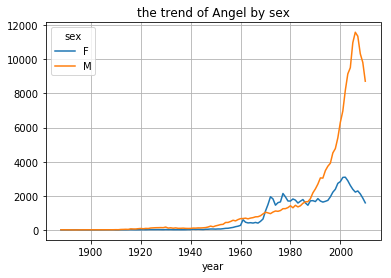

In [29]:
girl_or_boy = ['Angel','Johnnie','Rene','Harley']
angel = df[df['name']== 'Angel']
df02 = angel.pivot_table(values='births',index='year',columns='sex',fill_value=0)
df02.plot(title = "the trend of Angel by sex",grid =True)
plt.show()

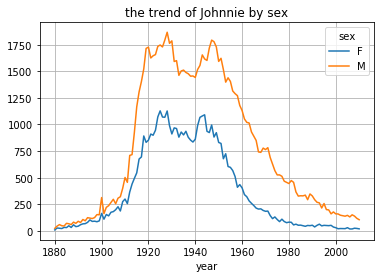

In [30]:
johnnie = df[df['name']== 'Johnnie']
df02 = johnnie.pivot_table(values='births',index='year',columns='sex',fill_value=0)
df02.plot(title = "the trend of Johnnie by sex",grid =True)
plt.show()

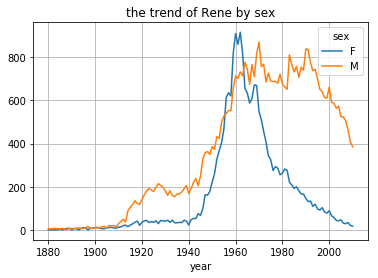

In [31]:
rene = df[df['name']== 'Rene']
df02 = rene.pivot_table(values='births',index='year',columns='sex',fill_value=0)
df02.plot(title = "the trend of Rene by sex",grid =True)
plt.show()

In [32]:
girl_names=set(df[df['sex']=='F']['name'])
boy_names=set(df[df['sex']=='M']['name'])
mixed_names=girl_names.intersection(boy_names)
len(mixed_names)

9652

分析男女共用的名字。

In [33]:
df08=df[df['name'].isin(mixed_names)]
df09=df08.pivot_table(values='births',index=['year','name'],columns='sex',fill_value=0)
df09.head()

sex           F    M
year name           
1880 Aaron    0  102
     Abbie   71    0
     Abbott   0    5
     Abby     6    0
     Abel     0    9